# Train Test Split

In [6]:
import pandas as pd
from pathlib import Path
DATA_PATH = Path('../data')

In [7]:
weeks = 30
df = pd.read_csv(DATA_PATH/f'train_data_{weeks}_weeks.csv', index_col=0)

In [8]:
y = df.pop('target')
X = df.copy()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Standarization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# ML Model Architecture

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Training and Testing ML Model

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) on train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared (R2) on train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"RMSE on train set: {rmse_train:.2f}")
print(f"RMSE on test set: {rmse_test:.2f}")

print(f"R-squared on train set: {r2_train:.2f}")
print(f"R-squared on test set: {r2_test:.2f}")



RMSE on train set: 6.30
RMSE on test set: 8.25
R-squared on train set: 0.97
R-squared on test set: 0.96


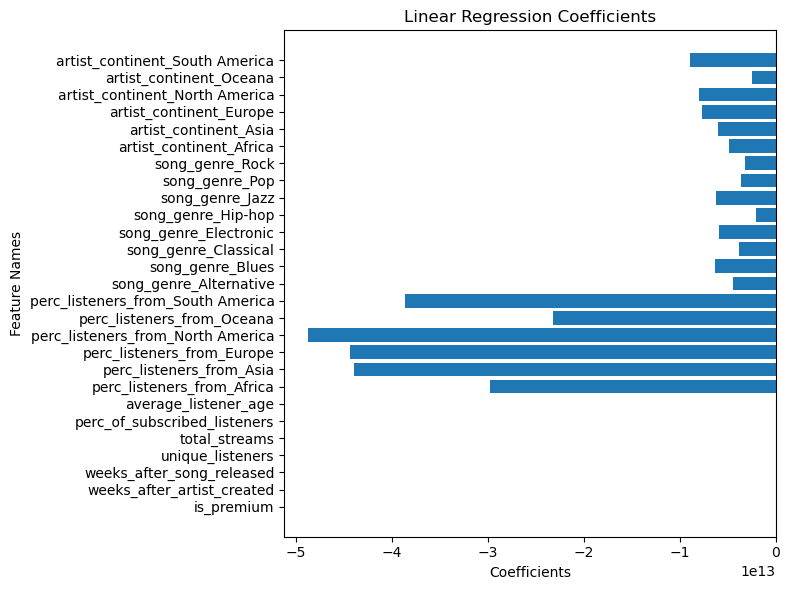

In [34]:
import matplotlib.pyplot as plt


# Get the coefficients and corresponding feature names
coefficients = model.coef_
feature_names = X.columns

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefficients)

# Add labels and title
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')
plt.title('Linear Regression Coefficients')

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
coefs_df = pd.DataFrame([feature_names, coefficients]).T
coefs_df.columns=['name', 'coef']
coefs_df = coefs_df.set_index('name')
coefs_df = coefs_df.sort_values('coef')

coefs_df

,coef
name,
perc_listeners_from_North America,-48760283559929.554688
perc_listeners_from_Europe,-44339799288345.25
perc_listeners_from_Asia,-43892865852957.265625
perc_listeners_from_South America,-38662523854098.289062
perc_listeners_from_Africa,-29718434969311.886719
perc_listeners_from_Oceana,-23175788072733.324219
artist_continent_South America,-8877097158642.367188
artist_continent_North America,-7943977424609.75
artist_continent_Europe,-7698135664389.408203


y = a*x1 + b*x2  # Linear Model

y - target 
x1 - is_premium
x2 - avg_age
a = 0.246542
b = 1343.345 

y_pred = 0.246542 * x1 + 1343.345 * x2

y_pred != y

RMSE(y, y_pred) = ERROR HIGH/LOW